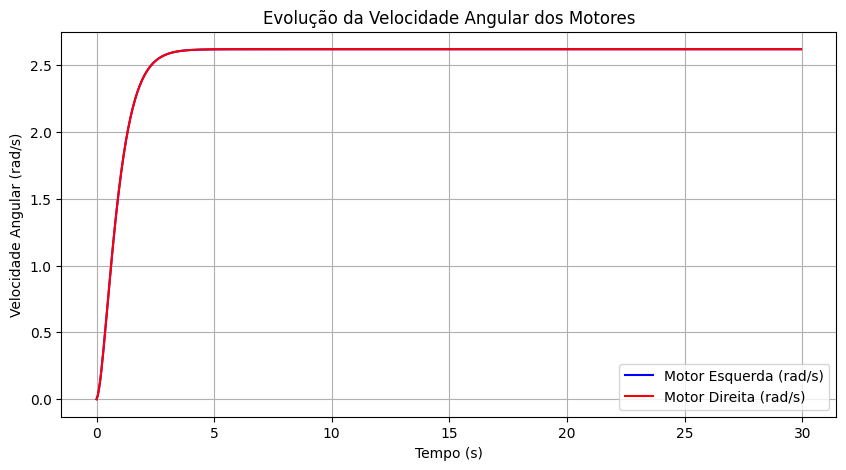

Velocidade angular máxima em regime permanente: 6.28 rad/s


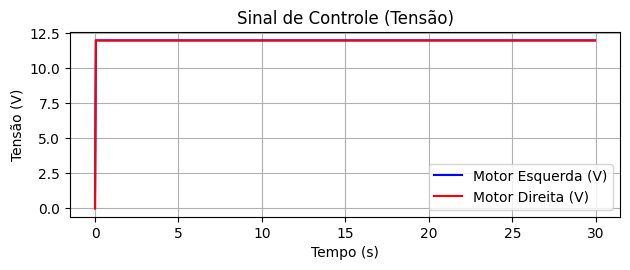

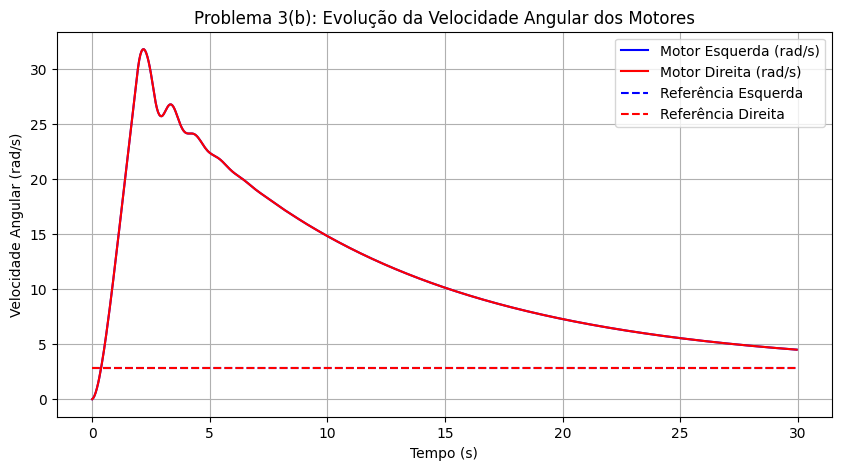

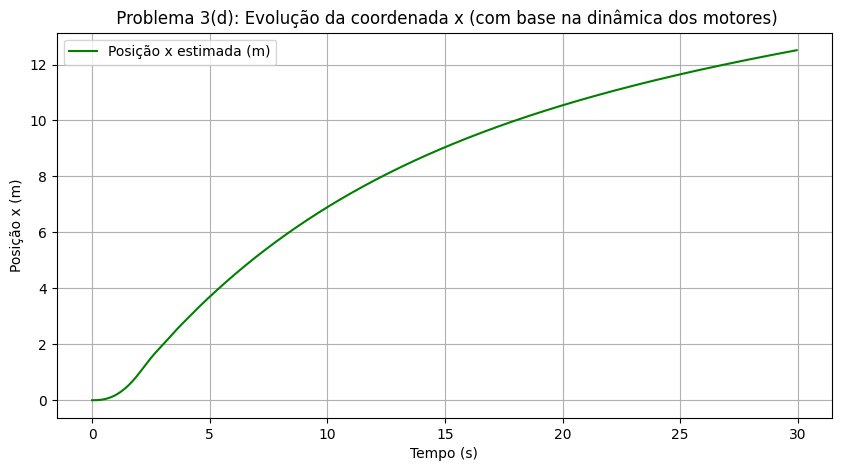

<Figure size 1000x600 with 0 Axes>

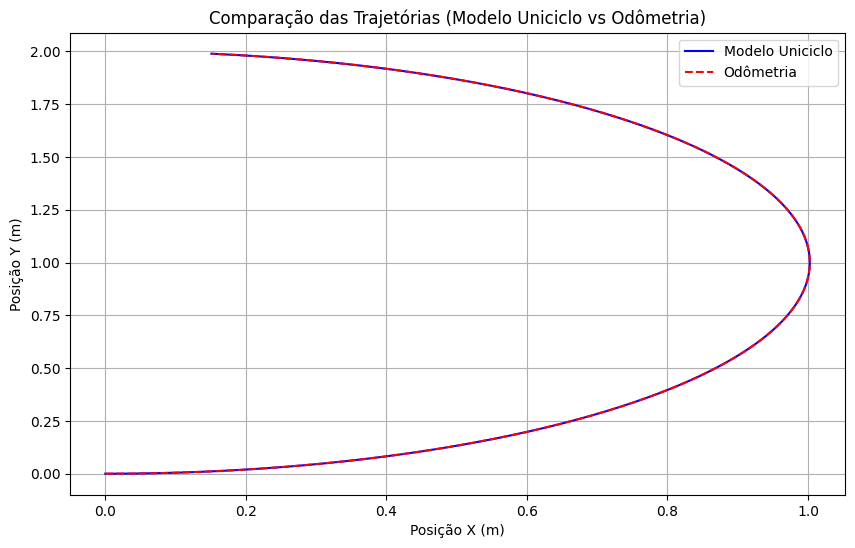

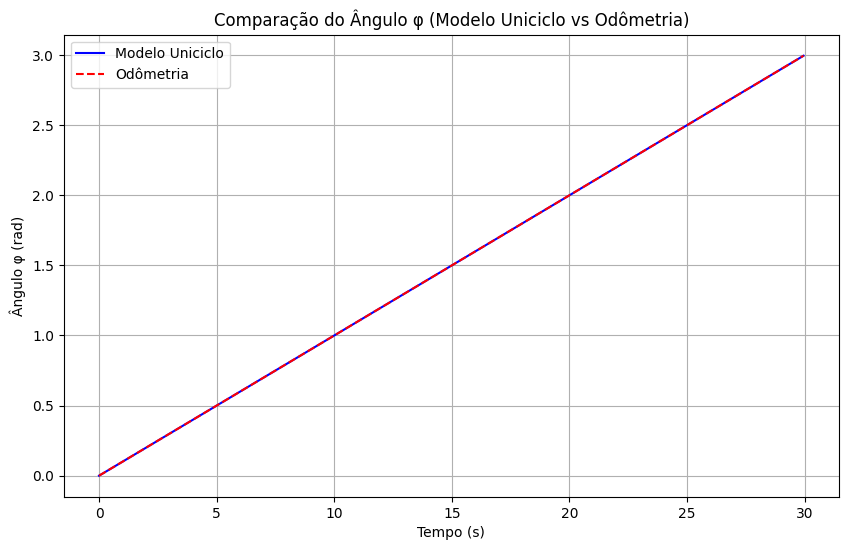

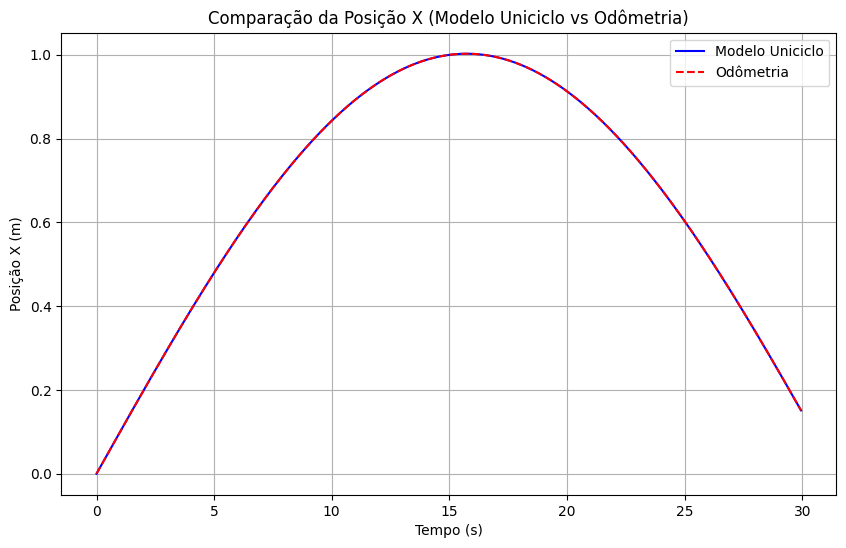

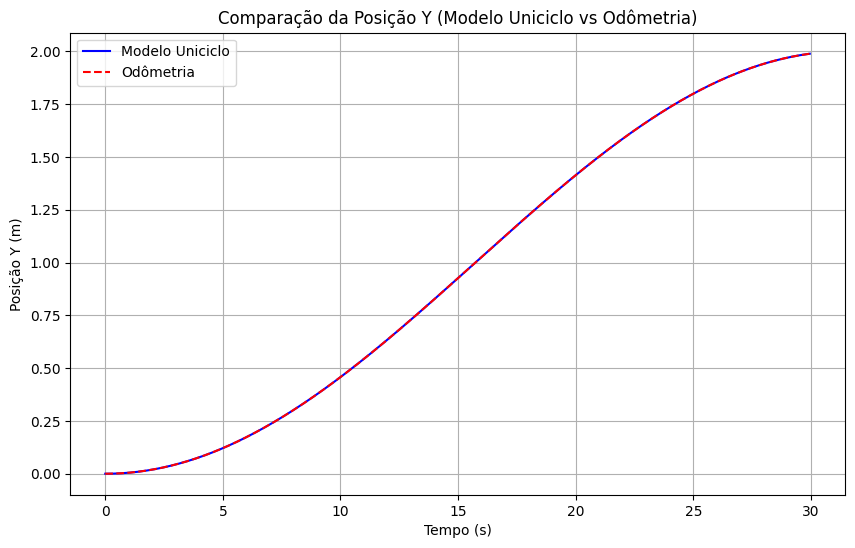

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parâmetros gerais:
dt = 0.05
tf = 30.0
t = np.arange(0.0, tf, dt)


#################
#### (1)  a. ####
#################

# Parâmetros do motor
J = 0.01  # Moment of inertia (kg.m^2)
b = 0.019  # Viscous friction constant (N.m.s)
Ke = 0.01  # Electromotive force constant (V/(rad/s))
Kt = 0.01  # Motor torque constant (N.m/Amp)
R = 1.0    # Electric resistance (Ohm)
L = 0.5    # Electric inductance (H)
v = 5.0    # Tensão de entrada (V)

# Tempo de simulação

# Vetores para armazenar os estados
theta_dot_left = np.zeros(len(t))
theta_dot_right = np.zeros(len(t))
current_left = np.zeros(len(t))
current_right = np.zeros(len(t))

# Condições iniciais
theta_dot_left[0] = 0.0
theta_dot_right[0] = 0.0
current_left[0] = 0.0
current_right[0] = 0.0

# Simulação
for k in range(1, len(t)):
    # Equações diferenciais dos motores (simplificadas para Euler)

    # Motor da Esquerda
    di_left = (v - R * current_left[k-1] - Ke * theta_dot_left[k-1]) / L * dt
    current_left[k] = current_left[k-1] + di_left

    d_theta_dot_left = (Kt * current_left[k] - b * theta_dot_left[k-1]) / J * dt
    theta_dot_left[k] = theta_dot_left[k-1] + d_theta_dot_left

    # Motor da Direita
    di_right = (v - R * current_right[k-1] - Ke * theta_dot_right[k-1]) / L * dt
    current_right[k] = current_right[k-1] + di_right

    d_theta_dot_right = (Kt * current_right[k] - b * theta_dot_right[k-1]) / J * dt
    theta_dot_right[k] = theta_dot_right[k-1] + d_theta_dot_right

# Plotagem da evolução da velocidade angular
plt.figure(figsize=(10, 5))
plt.plot(t, theta_dot_left, label='Motor Esquerda (rad/s)', color='b')
plt.plot(t, theta_dot_right, label='Motor Direita (rad/s)', color='r')
plt.title('Evolução da Velocidade Angular dos Motores')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade Angular (rad/s)')
plt.grid()
plt.legend()
plt.show()

#################
#### (1)  b. ####
#################

# Parâmetros do motor
v_max = 12.0  # Tensão máxima da fonte de alimentação (V)
Ke = 0.01     # Constante de força eletromotriz (V/(rad/s))

# Cálculo da velocidade máxima em regime permanente
theta_dot_max = v_max / ((R * b / Kt) + Ke)
print(f'Velocidade angular máxima em regime permanente: {theta_dot_max:.2f} rad/s')


#################
#### (1)  c. ####
#################

# Pela b, vemos que a vel máxima é de 6,28 rad/s e 3*pi rad/s é maior que o máximo. Logo, não é possível


#################
#### (2)  a. ####
#################

J = 0.01
b = 0.019
Ke = 0.01
Kt = 0.01
R = 1.0
L = 0.5
v_max = 12.0

Kp = 10.0
Ki = 1.0
Kd = 0.02

theta_dot_ref = 5 * np.pi

theta_dot_left = np.zeros(len(t))
theta_dot_right = np.zeros(len(t))
current_left = np.zeros(len(t))
current_right = np.zeros(len(t))
v_left = np.zeros(len(t))
v_right = np.zeros(len(t))
error_left = np.zeros(len(t))
error_right = np.zeros(len(t))
integral_left = 0.0
integral_right = 0.0

theta_dot_left[0] = 0.0
theta_dot_right[0] = 0.0
current_left[0] = 0.0
current_right[0] = 0.0


for k in range(1, len(t)):
    error_left[k] = theta_dot_ref - theta_dot_left[k-1]
    error_right[k] = theta_dot_ref - theta_dot_right[k-1]

    integral_left += error_left[k] * dt
    integral_right += error_right[k] * dt

    derivative_left = (error_left[k] - error_left[k-1]) / dt
    derivative_right = (error_right[k] - error_right[k-1]) / dt

    v_left[k] = Kp * error_left[k] + Ki * integral_left + Kd * derivative_left
    v_right[k] = Kp * error_right[k] + Ki * integral_right + Kd * derivative_right

    v_left[k] = np.clip(v_left[k], -v_max, v_max)
    v_right[k] = np.clip(v_right[k], -v_max, v_max)

    di_left = (v_left[k] - R * current_left[k-1] - Ke * theta_dot_left[k-1]) / L * dt
    current_left[k] = current_left[k-1] + di_left

    d_theta_dot_left = (Kt * current_left[k] - b * theta_dot_left[k-1]) / J * dt
    theta_dot_left[k] = theta_dot_left[k-1] + d_theta_dot_left

    di_right = (v_right[k] - R * current_right[k-1] - Ke * theta_dot_right[k-1]) / L * dt
    current_right[k] = current_right[k-1] + di_right

    d_theta_dot_right = (Kt * current_right[k] - b * theta_dot_right[k-1]) / J * dt
    theta_dot_right[k] = theta_dot_right[k-1] + d_theta_dot_right


plt.subplot(2, 1, 2)
plt.plot(t, v_left, label='Motor Esquerda (V)', color='b')
plt.plot(t, v_right, label='Motor Direita (V)', color='r')
plt.title('Sinal de Controle (Tensão)')
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


#################
#### (3)  a. ####
#################

u = 0.100
w = 0.000
R = 0.035
L = 0.280

we = (2*u + w*L) / (2*R)
wd = (2*u - w*L) / (2*R)

#################
#### (3)  b. ####
#################

theta_dot_ref_left = we
theta_dot_ref_right = wd

for k in range(1, len(t)):
    error_left[k] = theta_dot_ref_left - theta_dot_left[k-1]
    error_right[k] = theta_dot_ref_right - theta_dot_right[k-1]

    integral_left += error_left[k] * dt
    integral_right += error_right[k] * dt

    derivative_left = (error_left[k] - error_left[k-1]) / dt
    derivative_right = (error_right[k] - error_right[k-1]) / dt

    v_left[k] = Kp * error_left[k] + Ki * integral_left + Kd * derivative_left
    v_right[k] = Kp * error_right[k] + Ki * integral_right + Kd * derivative_right

    v_left[k] = np.clip(v_left[k], -v_max, v_max)
    v_right[k] = np.clip(v_right[k], -v_max, v_max)

    di_left = (v_left[k] - R * current_left[k-1] - Ke * theta_dot_left[k-1]) / L * dt
    current_left[k] = current_left[k-1] + di_left

    d_theta_dot_left = (Kt * current_left[k] - b * theta_dot_left[k-1]) / J * dt
    theta_dot_left[k] = theta_dot_left[k-1] + d_theta_dot_left

    di_right = (v_right[k] - R * current_right[k-1] - Ke * theta_dot_right[k-1]) / L * dt
    current_right[k] = current_right[k-1] + di_right

    d_theta_dot_right = (Kt * current_right[k] - b * theta_dot_right[k-1]) / J * dt
    theta_dot_right[k] = theta_dot_right[k-1] + d_theta_dot_right

plt.figure(figsize=(10, 5))
plt.plot(t, theta_dot_left, label='Motor Esquerda (rad/s)', color='b')
plt.plot(t, theta_dot_right, label='Motor Direita (rad/s)', color='r')
plt.plot(t, np.ones(len(t)) * theta_dot_ref_left, 'b--', label='Referência Esquerda')
plt.plot(t, np.ones(len(t)) * theta_dot_ref_right, 'r--', label='Referência Direita')
plt.title('Problema 3(b): Evolução da Velocidade Angular dos Motores')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade Angular (rad/s)')
plt.grid()
plt.legend()
plt.show()

#################
#### (3)  c. ####
#################

x = sp.symbols('x')
x_t = round(sp.integrate(u, (x, 0, tf)))

#################
#### (3)  d. ####
#################

x = np.zeros(len(t))

for k in range(1, len(t)):
    u_k = (R / 2) * (theta_dot_left[k] + theta_dot_right[k])
    x[k] = x[k-1] + u_k * dt

plt.figure(figsize=(10, 5))
plt.plot(t, x, label='Posição x estimada (m)', color='g')
plt.title(' Problema 3(d): Evolução da coordenada x (com base na dinâmica dos motores)')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição x (m)')
plt.grid()
plt.legend()
plt.show()



#################
## (4) a. e b. ##
#################

#Gráfico das velocidades angulares para diferentes ω:

# Função para calcular as velocidades angulares das rodas
def calc_vel_ang(u, omega, L, R):
    omega_e = (u - (L / 2) * omega) / R
    omega_d = (u + (L / 2) * omega) / R
    return omega_e, omega_d

# Parâmetros do robô (caso já estejam definidos no arquivo principal, pode comentar essas linhas)
R = 0.035  # Raio das rodas (m)
L = 0.28   # Distância entre as rodas (m)
limite_motor = 10  # Limite de operação do motor (rad/s)

# Velocidades lineares para os dois casos (u = 0.1 e u = 0.2)
u1 = 0.1  # m/s
u2 = 0.2  # m/s

# Geração de valores de ω de 0 até 0.5 rad/s
omega_values = np.linspace(0, 0.5, 100)

# Listas para armazenar as velocidades angulares das rodas
vel_ang_esq_u1, vel_ang_dir_u1 = [], []
vel_ang_esq_u2, vel_ang_dir_u2 = [], []

# Calculando as velocidades angulares para cada ω
for omega in omega_values:
    ve_u1, vd_u1 = calc_vel_ang(u1, omega, L, R)
    vel_ang_esq_u1.append(ve_u1)
    vel_ang_dir_u1.append(vd_u1)

    ve_u2, vd_u2 = calc_vel_ang(u2, omega, L, R)
    vel_ang_esq_u2.append(ve_u2)
    vel_ang_dir_u2.append(vd_u2)

#################
#### (4)  c. ####
#################
#Encontrar o valor máximo de ω permitido para u = 0.1 m/s:

# Função para encontrar o valor máximo de ω permitido
def max_omega(u, L, R, limite_motor):
    omega_max = 2 * ((limite_motor * R) - u) / L
    return omega_max

# Valor máximo de ω para u = 0.1 m/s
omega_max_u1 = max_omega(u1, L, R, limite_motor)

# Mostrar o valor de ω máximo no gráfico
plt.figure(figsize=(10, 6))

# Gráfico para ω crescente até o máximo calculado
omega_values_max = np.linspace(0, omega_max_u1, 100)

vel_ang_esq_max, vel_ang_dir_max = [], []
for omega in omega_values_max:
    ve_max, vd_max = calc_vel_ang(u1, omega, L, R)
    vel_ang_esq_max.append(ve_max)
    vel_ang_dir_max.append(vd_max)


#################
#### (5)  a. ####
#################

# ============================
# Função para calcular as velocidades angulares das rodas
# ============================
def calc_vel_ang(u, omega, L, R):
    omega_e = (u - (L / 2) * omega) / R
    omega_d = (u + (L / 2) * omega) / R
    return omega_e, omega_d

# Parâmetros do robô (comente se já estiverem definidos no seu projeto principal)
R = 0.035  # Raio das rodas (m)
L = 0.28   # Distância entre as rodas (m)

# ============================
# Dados de entrada
# ============================
dt = 0.05  # Intervalo de tempo (50ms)
tf = 30  # Tempo total de simulação (30s)
t = np.arange(0, tf, dt)  # Vetor de tempo

u = 0.1  # Velocidade linear (m/s)
omega = 0.1  # Velocidade angular (rad/s)

# ============================
# Método 1: Integração do Modelo Uniciclo
# ============================
x_r = np.zeros_like(t)  # Posição x
y_r = np.zeros_like(t)  # Posição y
phi_r = np.zeros_like(t)  # Ângulo phi

# Integração do modelo uniciclo
for i in range(1, len(t)):
    x_r[i] = x_r[i - 1] + u * np.cos(phi_r[i - 1]) * dt
    y_r[i] = y_r[i - 1] + u * np.sin(phi_r[i - 1]) * dt
    phi_r[i] = phi_r[i - 1] + omega * dt

# ============================
# Método 2: Odometria
# ============================
omega_e, omega_d = calc_vel_ang(u, omega, L, R)

x_o = np.zeros_like(t)  # Posição x
y_o = np.zeros_like(t)  # Posição y
phi_o = np.zeros_like(t)  # Ângulo phi

# Simulação da odometria
for i in range(1, len(t)):
    v = R * (omega_e + omega_d) / 2  # Velocidade linear média
    w = R * (omega_d - omega_e) / L  # Velocidade angular

    x_o[i] = x_o[i - 1] + v * np.cos(phi_o[i - 1]) * dt
    y_o[i] = y_o[i - 1] + v * np.sin(phi_o[i - 1]) * dt
    phi_o[i] = phi_o[i - 1] + w * dt


# Plotando os Resultados
# Gráfico 1: Trajetória no plano (x, y)
plt.figure(figsize=(10, 6))
plt.plot(x_r, y_r, label='Modelo Uniciclo', color='blue')
plt.plot(x_o, y_o, label='Odômetria', color='red', linestyle='--')
plt.xlabel('Posição X (m)')
plt.ylabel('Posição Y (m)')
plt.title('Comparação das Trajetórias (Modelo Uniciclo vs Odômetria)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico 2: Ângulo phi ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(t, phi_r, label='Modelo Uniciclo', color='blue')
plt.plot(t, phi_o, label='Odômetria', color='red', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo φ (rad)')
plt.title('Comparação do Ângulo φ (Modelo Uniciclo vs Odômetria)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico 3: Posição X ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(t, x_r, label='Modelo Uniciclo', color='blue')
plt.plot(t, x_o, label='Odômetria', color='red', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição X (m)')
plt.title('Comparação da Posição X (Modelo Uniciclo vs Odômetria)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico 4: Posição Y ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(t, y_r, label='Modelo Uniciclo', color='blue')
plt.plot(t, y_o, label='Odômetria', color='red', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição Y (m)')
plt.title('Comparação da Posição Y (Modelo Uniciclo vs Odômetria)')
plt.legend()
plt.grid(True)
plt.show()


# **Problema 1**

**C)** Pela b, vemos que a vel máxima é de 6,28 rad/s e 3*pi rad/s é maior que o máximo. Logo, não é possível.

# **Problema 2**

**A)** Simulado e plotado no código.

**B)** A resposta não é instantânea, isso devido às características do sistema. A resposta é gradual, e depende de fatores como a inércia, o atrito viscoso, a dinâmica elétrica do motor e a ação do controlador PID. Quando aplicamos uma tensão ao motor, a velocidade angular aumenta gradualmente até atingir a referência desejada. No gráfico é possível visualizar que a velocidade não salta imediatamente para a referência, há um tempo de subida até que o sistema estabilize na velocidade desejada.

**C)** 5 segundos.

**D)** Para gerar um sinal de tensão a partir de um controlador PID na prática, podemos utilizar uma combinação de hardware e técnicas de controle. Utilizando abordagens como o uso de microcontroladores, conversores digital-analógico (DAC), PWM, Amplificadores operacionais, etc.

\
# **Problema 3**

**A)** Calculado no código, sendo o valor final:

We = 2.857\
Wd = 2.857

\
**B)** Simulado e plotado no código.

**C)** Calculado no código, sendo o valor final:

x = 3 metros

\
**D)** Simulado e plotado no código.

\
**E)** A diferença entre os valores de x calculados pelos dois métodos se dá porque o primeiro método assume uma velocidade linear constante u, enquanto o segundo leva em conta as variações de ωe e ωd, afetadas pelo controlador PID e pelas dinâmicas dos motores. As imperfeições e o tempo de resposta do controlador PID fazem com que o u(t) real não seja exatamente constante, resultando em uma diferença no valor final de x.

\
# **Problema 4**
**A)** Sim, é possível exigir do robô uma velocidade linear (𝑢 = 0.1 m/s) e uma velocidade angular (𝜔 = 0.1 rad/s). Ao calcular as velocidades angulares das rodas, ambas as condições atendem aos limites do motor, que é de 10 rad/s. Portanto, essas velocidades são viáveis dentro dos parâmetros definidos.

**B)** Não é viável exigir do robô uma velocidade linear 𝑢 = 0.2 m/s e uma velocidade angular 𝜔 = 0.2 rad/s. Ao calcular as velocidades angulares das rodas para essas condições.

**C)** É aproximadamente, 0,856 rad/s. Esse valor garante que as velocidades angulares das rodas não ultrapassem o limite de operação do motor, mantendo a performance do robô dentro dos parâmetros seguros.

\
# **Problema 5**
**A)** Está respondido nas linhas de código.

**B)** As divergências entre 𝑝𝑜 e 𝑝r surgem devido ao acúmulo de erros na odometria, que é sensível a imprecisões nas medições incrementais, como desvios nas velocidades das rodas.

Enquanto o modelo uniciclo é teórico e não considera fatores como deslizamento ou ruídos nos sensores, a odometria reflete as limitações práticas. Além disso, pequenas diferenças nos parâmetros do robô e a discretização das velocidades podem ampliar essas diferenças ao longo do tempo, especialmente em trajetórias mais longas ou complexas.

**C)** O desempenho de 𝑝𝑜 ​depende da precisão das medições das rodas, da calibração dos parâmetros do robô e da minimização de fatores como deslizamentos e erros de sensores, além do acúmulo de pequenos erros na integração ao longo do tempo.